<a href="https://colab.research.google.com/github/AT200210/Data_Science/blob/main/DL/ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Types of activation function

1. Linear Function
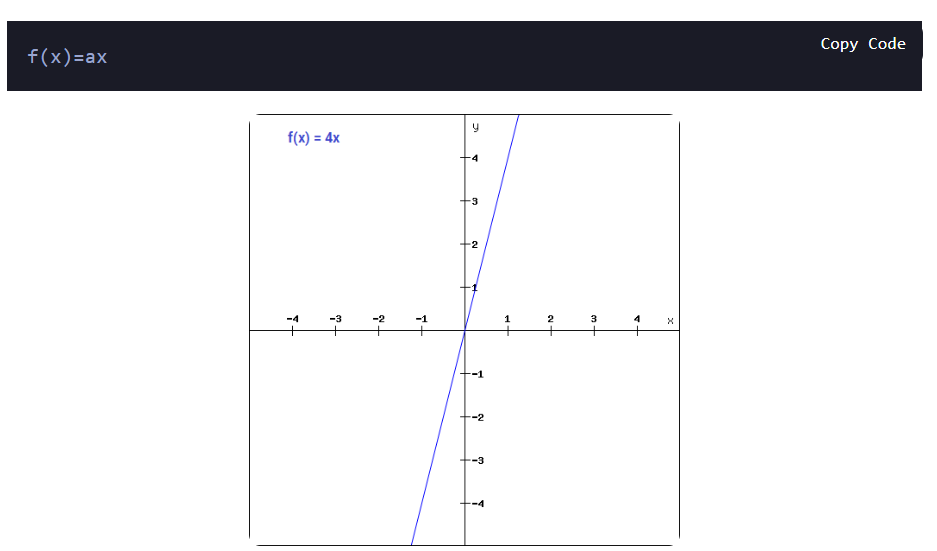

2. Binary step function

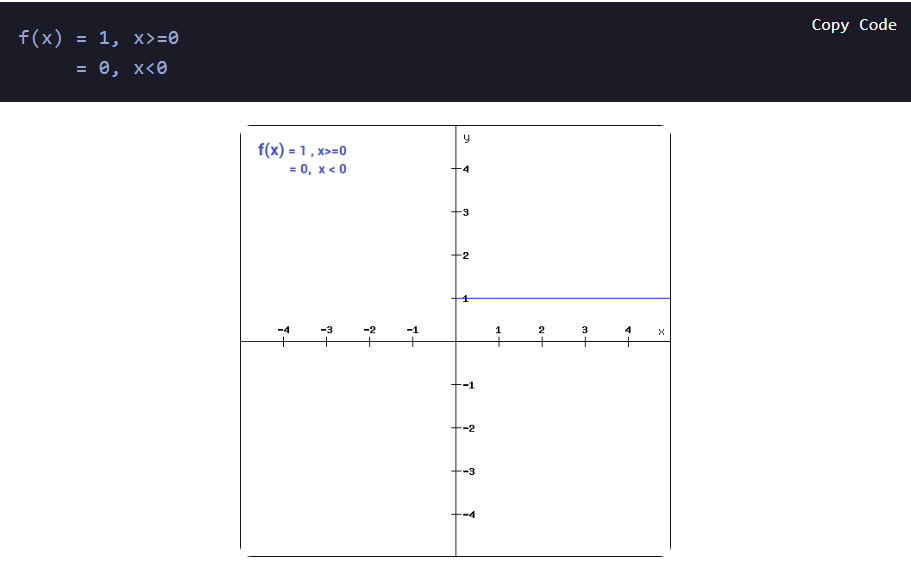

3. Sigmoid activation function
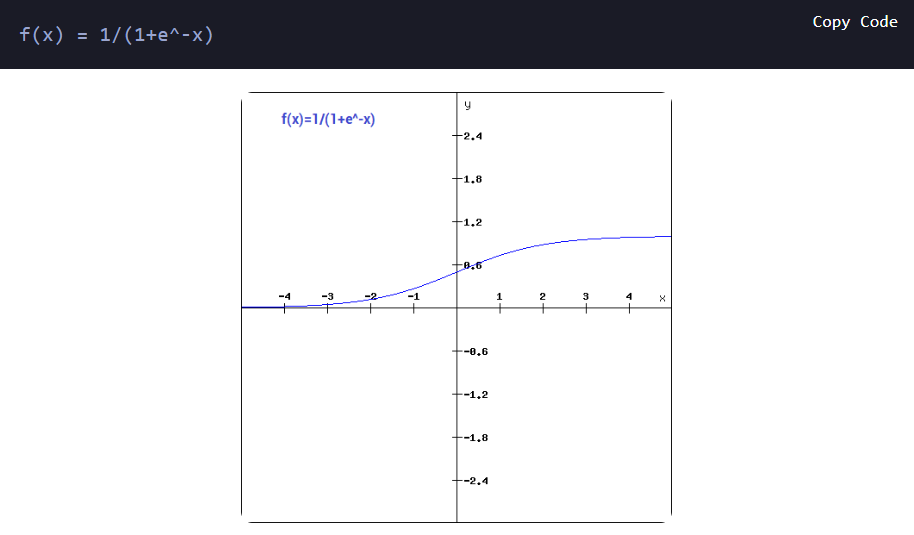

3. RelU Recitified Linear Unit
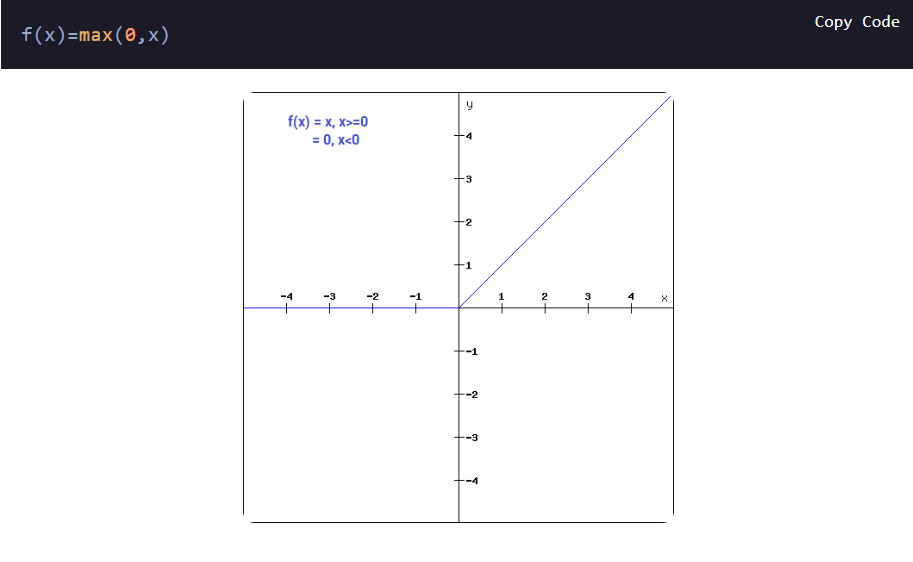

4. Leaky ReLU
Improved version of ReLU. In ReLu the gradient is 0 for x<0 which would deactivate the neuron.
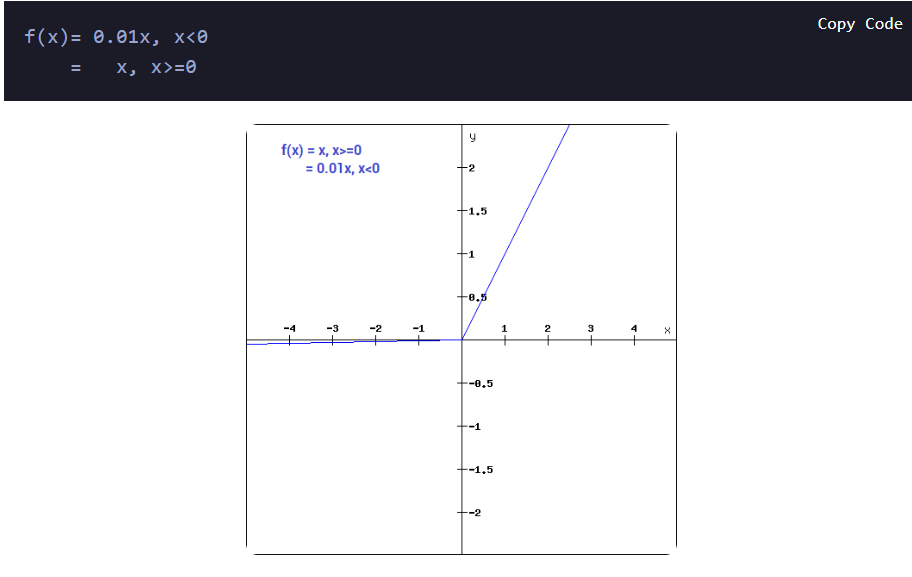

5. Softmax
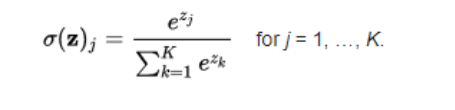

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-5-1bd254d199ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=data, palette=pal)


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

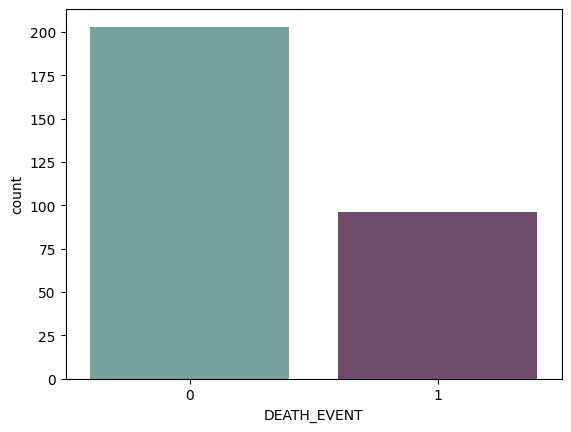

In [5]:
pal= ["#6daa9f","#774571"]
sns.countplot(x='DEATH_EVENT', data=data, palette=pal)

<Axes: >

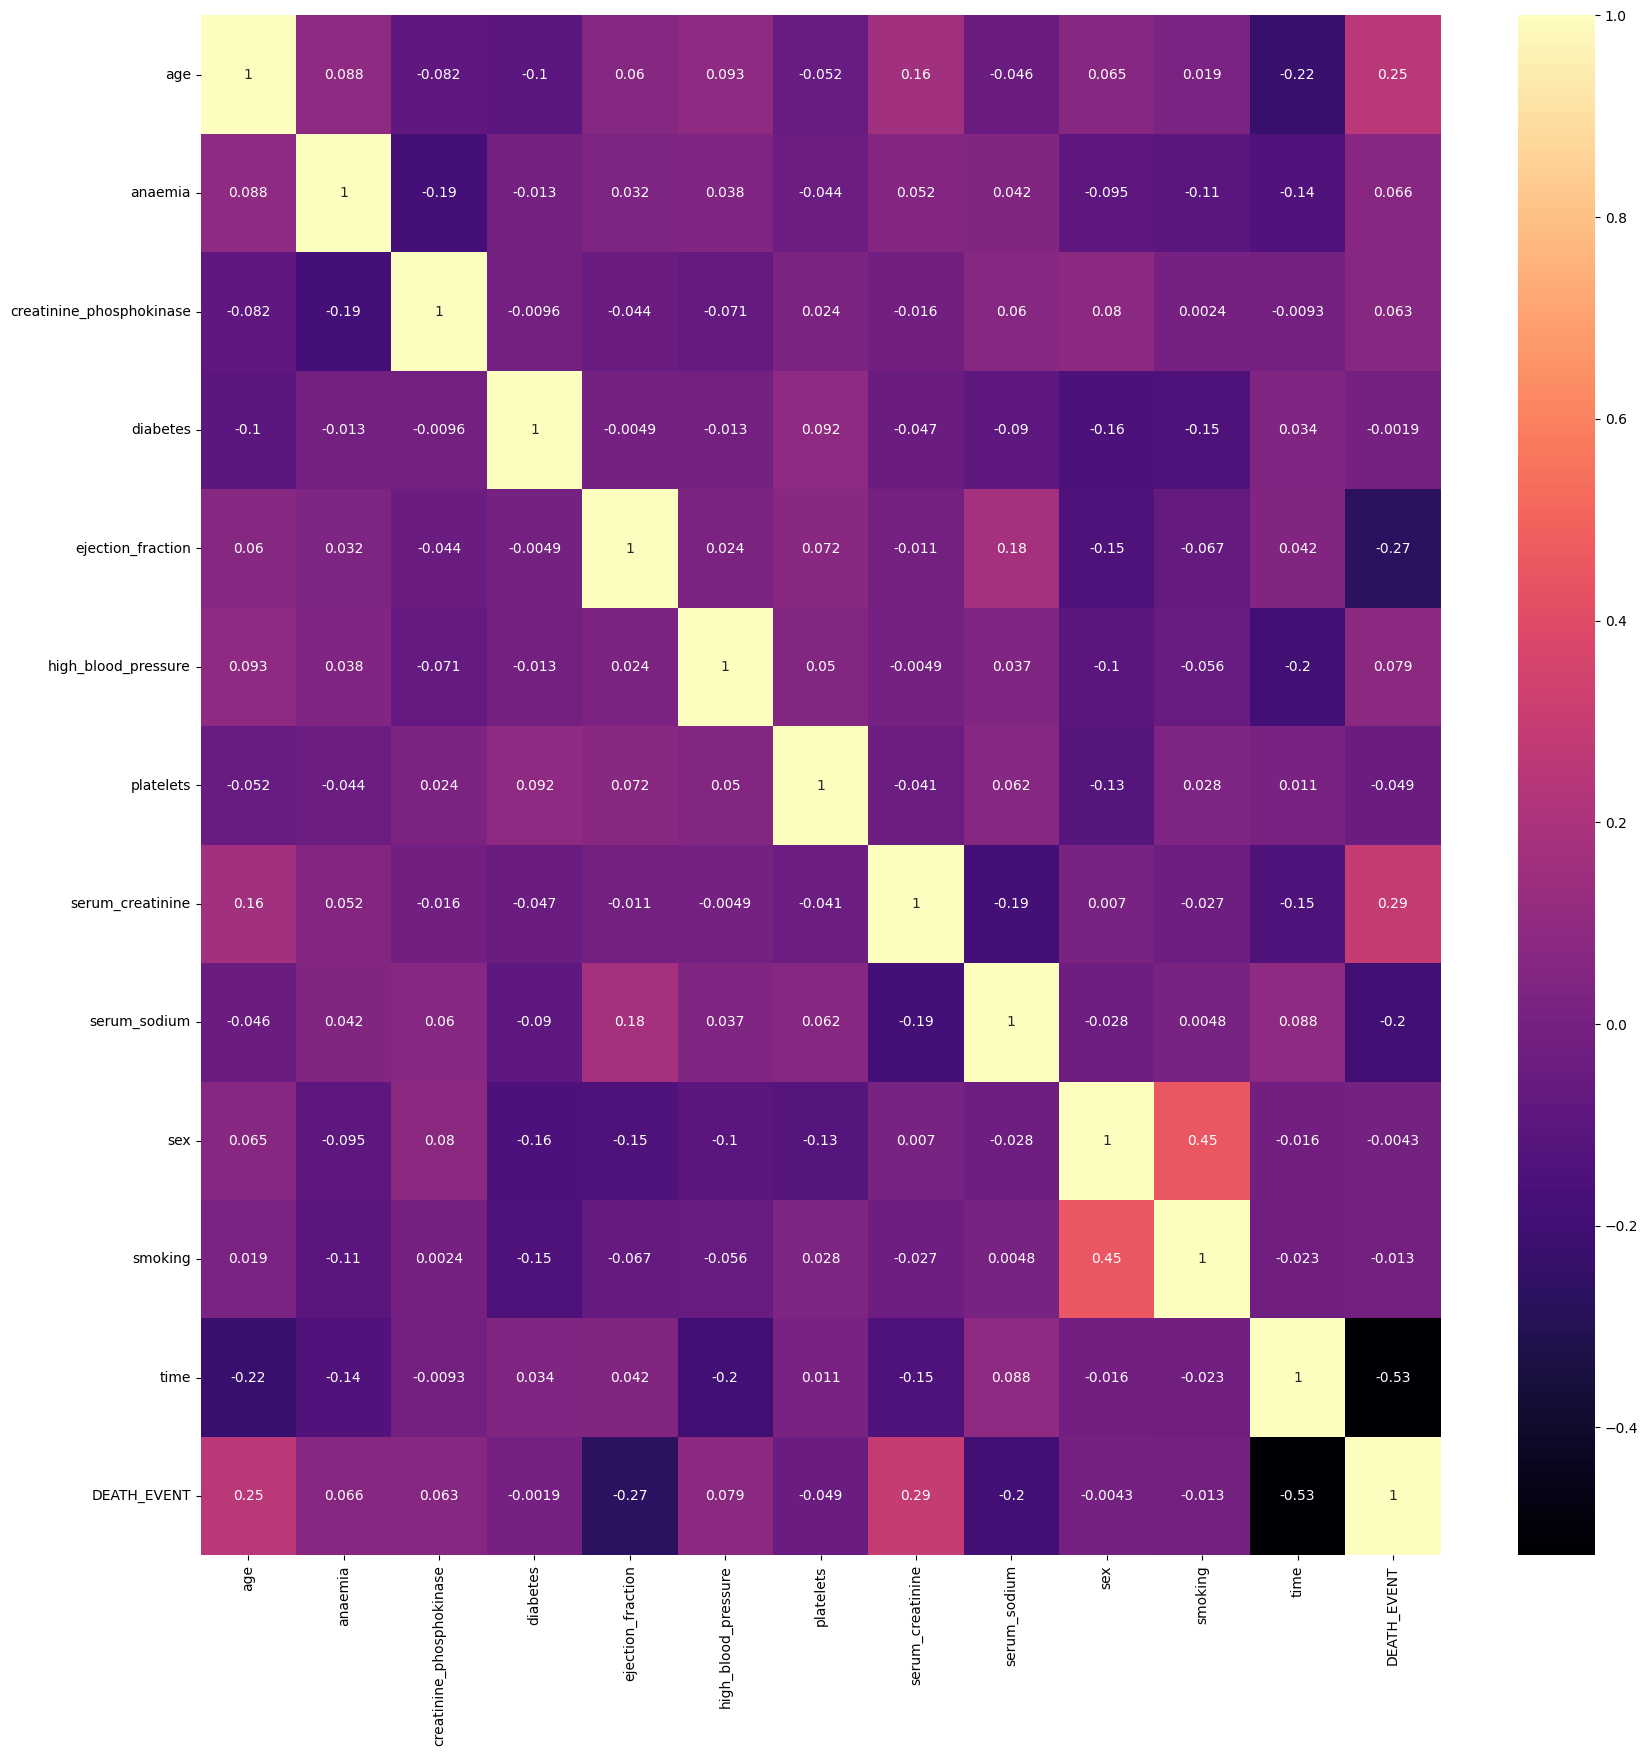

In [9]:
correlation=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='magma')

<Axes: xlabel='age', ylabel='count'>

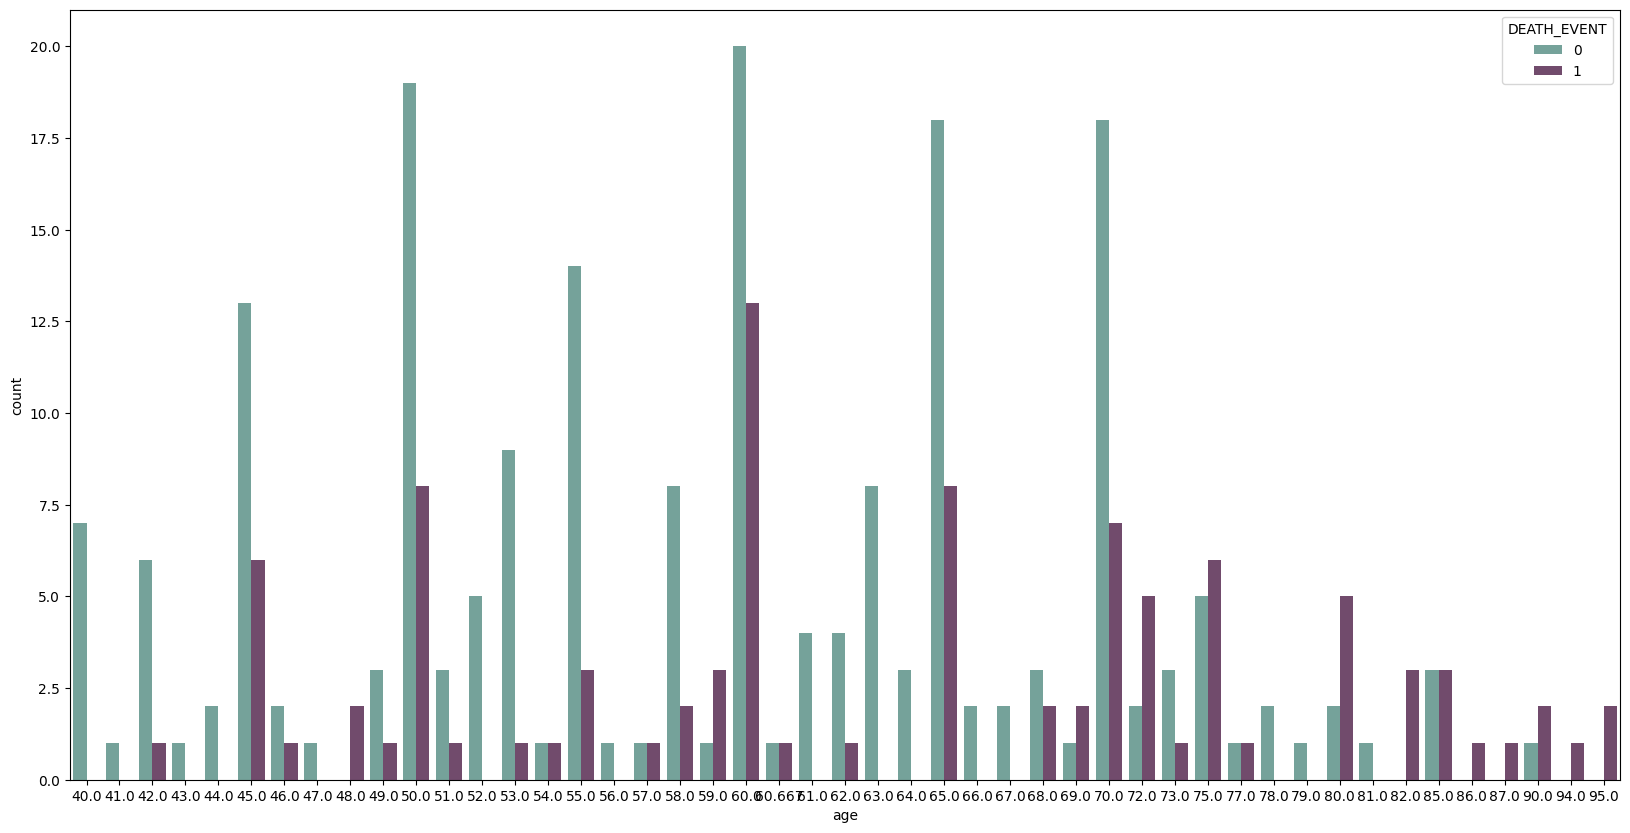

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='age', hue='DEATH_EVENT',data=data, palette=pal)

<Axes: xlabel='smoking', ylabel='count'>

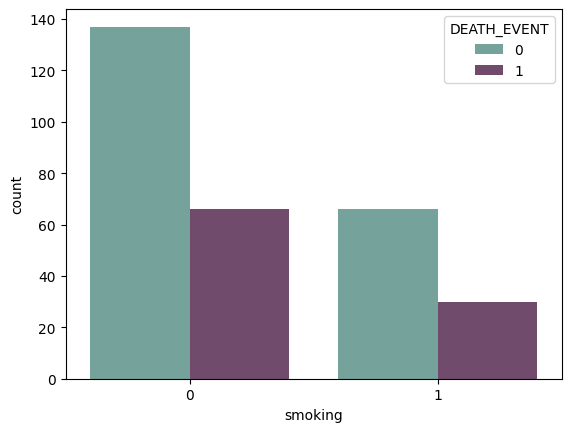

In [15]:
sns.countplot(x='smoking', hue='DEATH_EVENT',data=data, palette=pal)

<ipython-input-16-010b0d261547>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-010b0d261547>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-010b0d261547>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)
<ipython-input-16-010b0d261547>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

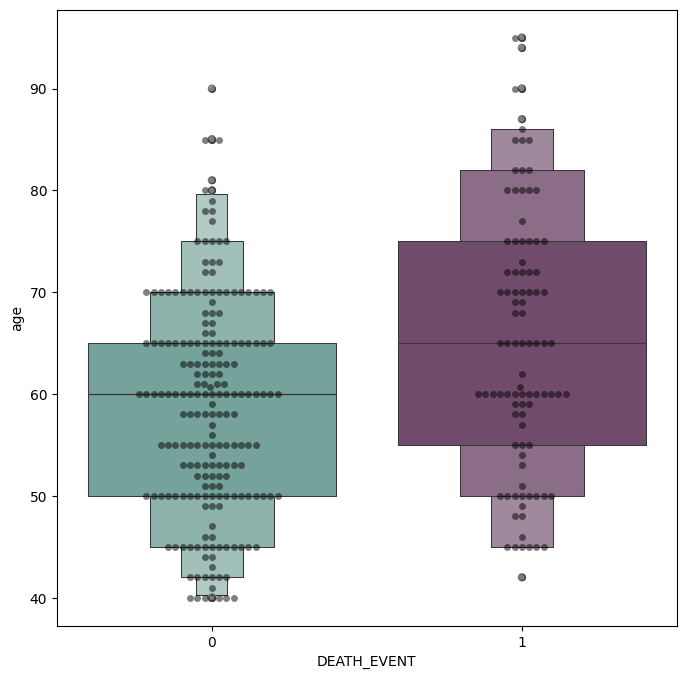

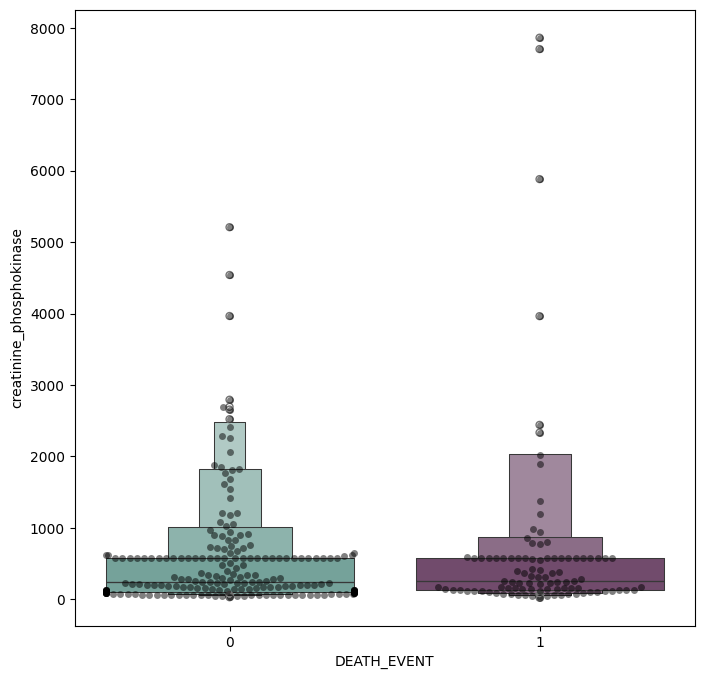

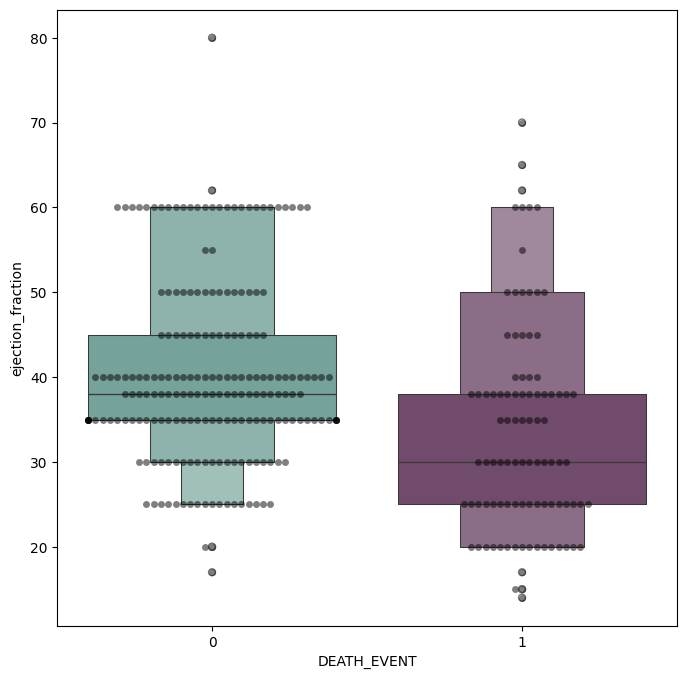

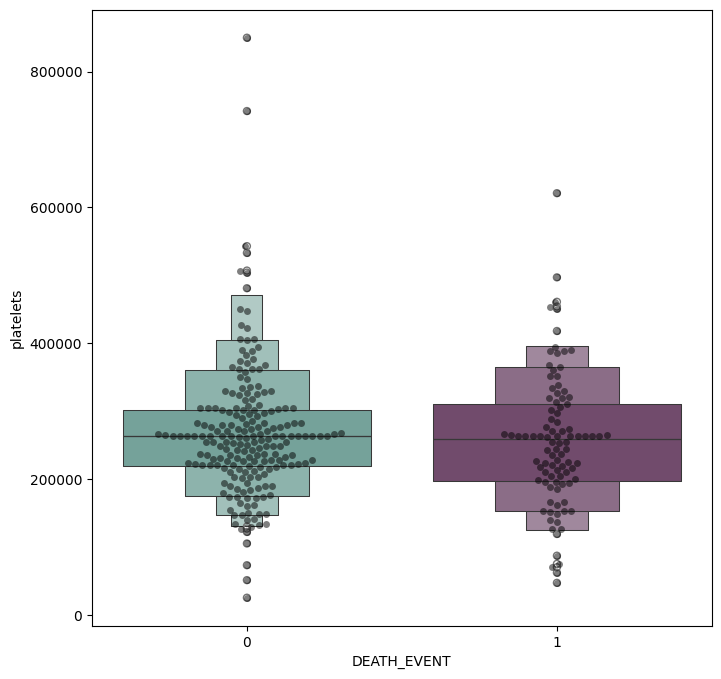

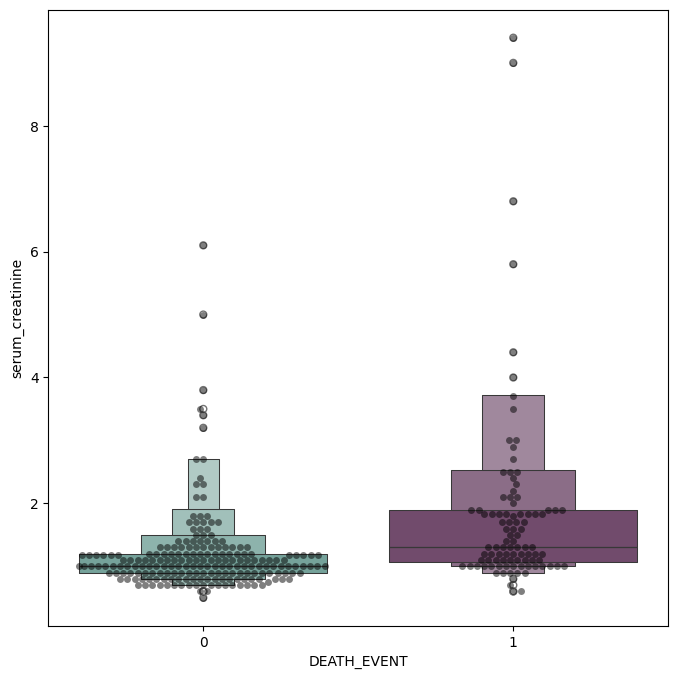

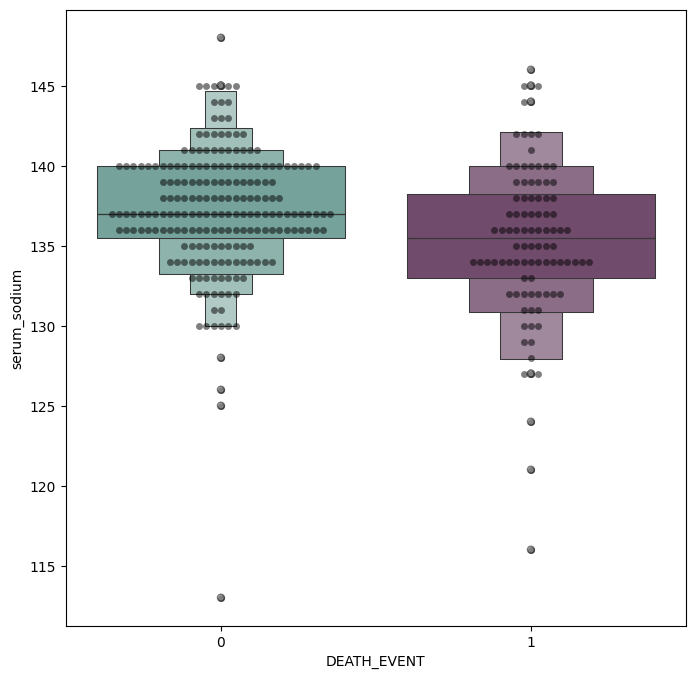

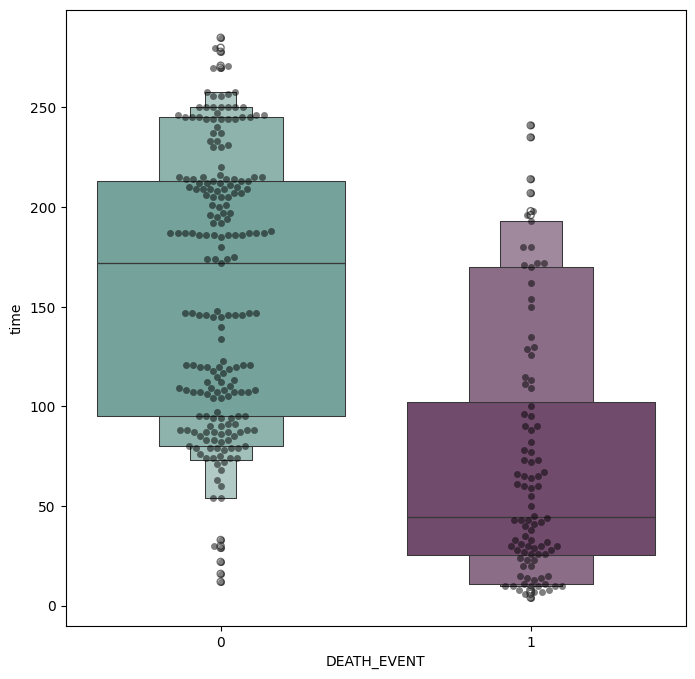

In [16]:
feature=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
for i in feature:
  plt.figure(figsize=(8,8))
  sns.swarmplot(x='DEATH_EVENT', y=i, data=data, color="black", alpha=0.5)
  sns.boxenplot(x='DEATH_EVENT', y=i, data=data, palette=pal)

In [17]:
X=data.drop('DEATH_EVENT', axis=1)
y=data['DEATH_EVENT']

In [18]:
col_names=list(X.columns)
scaler=StandardScaler()
X_df=scaler.fit_transform(X)
X_df=pd.DataFrame(X_df, columns=col_names)

In [20]:
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X_df, y, test_size=0.2, random_state=42)

In [26]:
early_stopping=tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

model=Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history=model.fit(X_train, y_train, epochs=500, validation_split=0.2, batch_size=35 ,callbacks=[early_stopping])

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.6614 - loss: 0.6929 - val_accuracy: 0.7500 - val_loss: 0.6915
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6619 - loss: 0.6918 - val_accuracy: 0.7500 - val_loss: 0.6900
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7090 - loss: 0.6902 - val_accuracy: 0.7500 - val_loss: 0.6882
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6933 - loss: 0.6890 - val_accuracy: 0.7500 - val_loss: 0.6863
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6815 - loss: 0.6879 - val_accuracy: 0.7500 - val_loss: 0.6843
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7156 - loss: 0.6853 - val_accuracy: 0.7500 - val_loss: 0.6819
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6928 - loss: 0.6838 - val_accuracy: 0.7500 - val_loss: 0.6792
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6607 - loss: 0.6837 - val_accuracy: 0.7500 - val_loss:

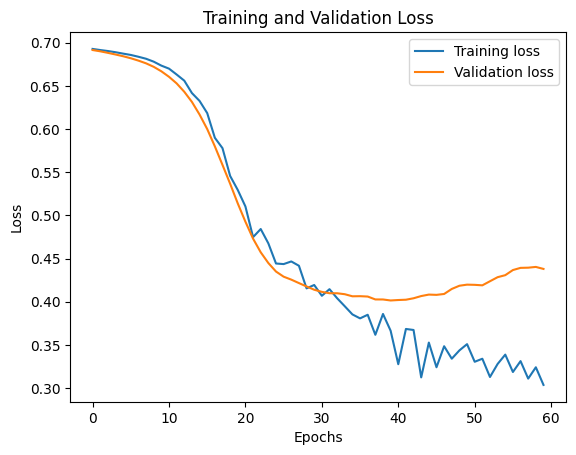

In [29]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']],label='Training loss')
plt.plot(history_df.loc[:,['val_loss']],label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

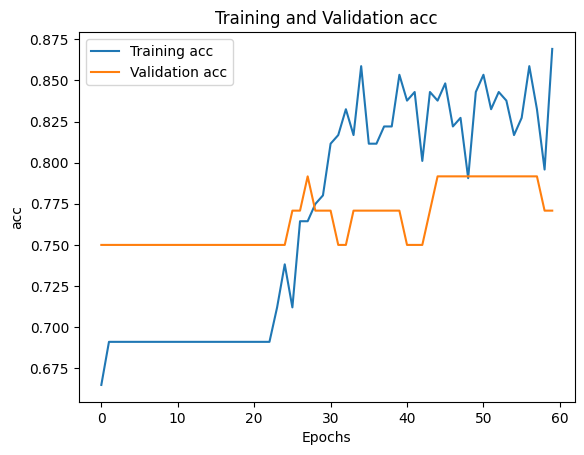

In [31]:
history_df=pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['accuracy']],label='Training acc')
plt.plot(history_df.loc[:,['val_accuracy']],label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

In [36]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



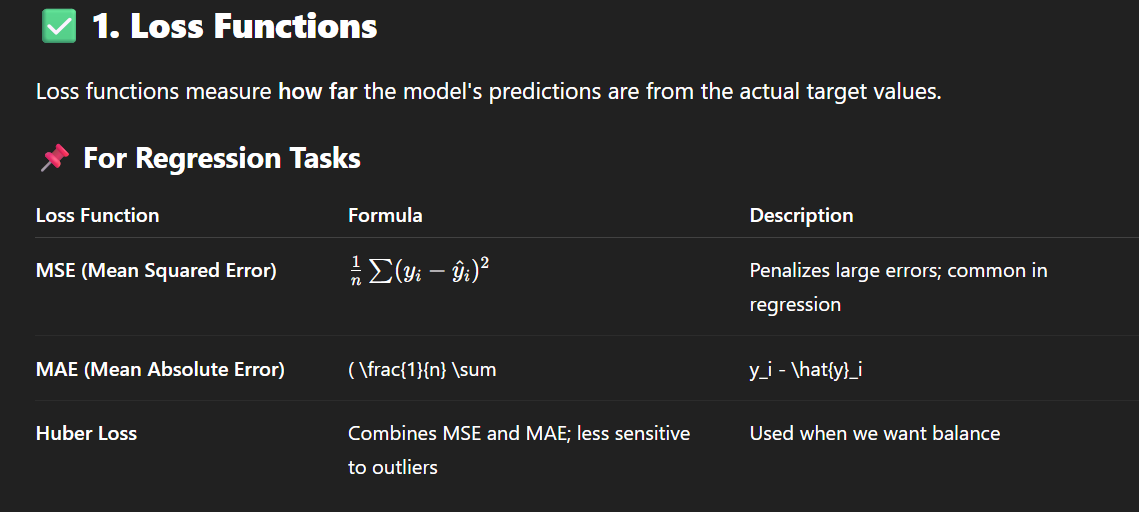

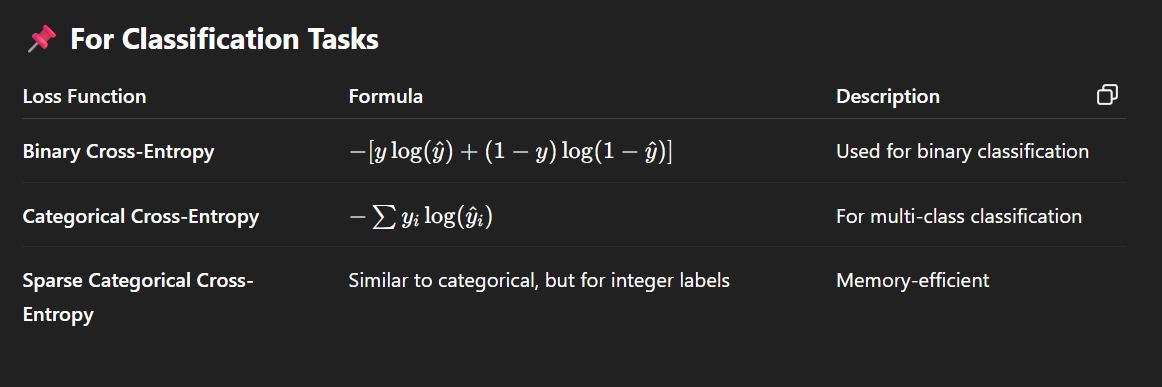

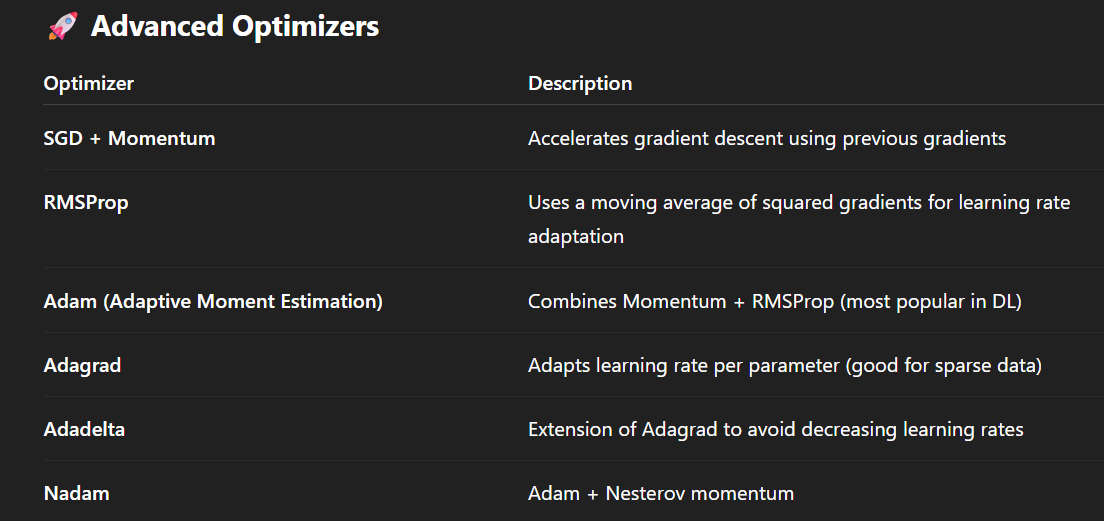